# AlertSphere: Disaster Tweet Detector

## Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1.Read the dataset 

In [2]:
df = pd.read_csv('disaster_tweets_data(DS).csv',encoding='latin1')
df.head()

,tweets,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
df.shape

(7613, 2)

In [4]:
df['tweets'][7]

"I'm on top of the hill and I can see a fire in the woods..."

## 2.Remove handle null values (if any).

In [5]:
df.isnull().sum()

tweets    0
target    0
dtype: int64

### Plotting Charts 

In [6]:
count_of_1 = df['target'].value_counts().get(1)
print(count_of_1)

count_of_0 = df['target'].value_counts().get(0)
print(count_of_0)

3271
4342


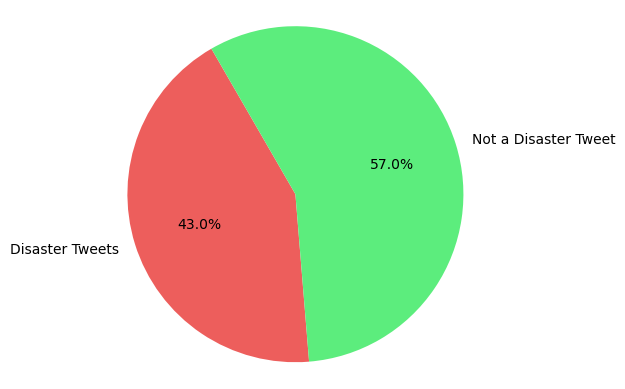

In [7]:
labels= 'Disaster Tweets', 'Not a Disaster Tweet'
sizes=[count_of_1,count_of_0]
colors=['#ED5E5C','#5CED7D']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=120)
plt.axis('equal')
plt.show()

Based on the information provided by the pie chart, it appears that approximately 43% of the tweets in the dataset are related to disasters, while the remaining 57% are not. Given the relatively small difference between the proportions of disaster and non-disaster tweets, it suggests that there may not be a significant imbalance in the dataset. Therefore, there may be no immediate need for techniques such as undersampling or oversampling to address class imbalance.

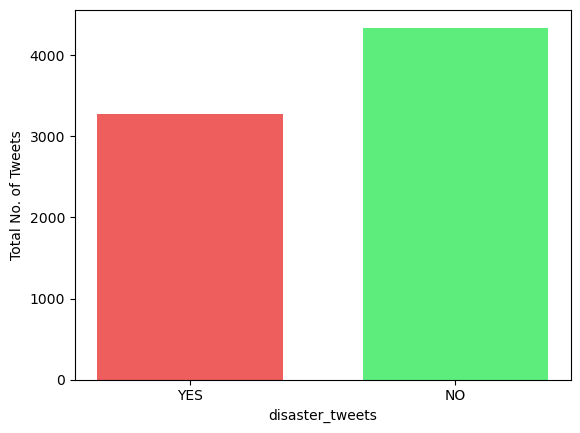

In [8]:
disaster_tweets= ['YES', 'NO']
values= [count_of_1, count_of_0]
colors=['#ED5E5C','#5CED7D']
plt.bar(disaster_tweets, values, color=colors, width=0.7)
plt.xlabel('disaster_tweets')
plt.ylabel('Total No. of Tweets')
plt.show()

## 3.Preprocess the disaster tweets data:

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

In [10]:
sw = stopwords.words("English")
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
lm = WordNetLemmatizer()


In [12]:
for i in df['tweets'].iloc[:5]:
    print(i)

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
Forest fire near La Ronge Sask. Canada
All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
13,000 people receive #wildfires evacuation orders in California 
Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school 


a)Tokenizing words
b)Convert words to lower case
c)Removing Punctuations
d)Removing Stop words
e)Stemming or lemmatizing the words

In [13]:
data=[]
for i in df['tweets'].iloc[:5]:
    t=i.lower()
    t= re.sub("['^A-Zz-z']"," ",t)
    t= word_tokenize(t)
    t=[i for i in t if i not in sw]
    t= [lm.lemmatize(i) for i in t]
    t= " ".join(t)
    data.append(t)
print(data)

['deed reason # earthquake may allah forgive u', 'forest fire near la ronge sask . canada', 'resident asked shelter place notified officer . evacuation shelter place order expected', '13,000 people receive # wildfire evacuation order california', 'got sent photo ruby # alaska smoke # wildfire pours school']


In [14]:
cleansed_tweets=[]
for i in df['tweets']:
    t=i.lower()
    t= re.sub("['^A-Zz-z']"," ",t)
    t= word_tokenize(t)
    t=[i for i in t if i not in sw]
    t= [lm.lemmatize(i) for i in t]
    t= " ".join(t)
    cleansed_tweets.append(t)
print(cleansed_tweets)

['deed reason # earthquake may allah forgive u', 'forest fire near la ronge sask . canada', 'resident asked shelter place notified officer . evacuation shelter place order expected', '13,000 people receive # wildfire evacuation order california', 'got sent photo ruby # alaska smoke # wildfire pours school', '# rockyfire update = > california hwy . 20 closed direction due lake county fire - # cafire # wildfire', '# flood # disaster heavy rain cause flash flooding street manitou , colorado spring area', 'top hill see fire wood ...', 'emergency evacuation happening building across street', 'afraid tornado coming area ...', 'three people died heat wave far', 'haha south tampa getting flooded hah- wait second live south tampa gon na gon na fvck # flooding', '# raining # flooding # florida # tampabay # tampa 18 19 day . lost count', '# flood bago myanmar # arrived bago', 'damage school bus 80 multi car crash # breaking', 'man ?', 'love fruit', 'summer lovely', 'car fast', 'goooooooaaaaaal ! 

In [15]:
print(len(cleansed_tweets))

7613


## 4.Select x(independent feature) & y(dependent feature).

In [16]:
x= np.array(cleansed_tweets)
y= df["target"]
print(type(x))
print(type(y))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [17]:
print(x)

['deed reason # earthquake may allah forgive u'
 'forest fire near la ronge sask . canada'
 'resident asked shelter place notified officer . evacuation shelter place order expected'
 ... 'm1.94 [ 01:04 utc ] ? 5km volcano hawaii . http : //t.co/ dtoyd8ebj'
 'police investigating e-bike collided car little portugal . e-bike rider suffered serious non-life threatening injury .'
 'latest : home ra ed northern california wildfire - abc news http : //t.co/ymy4rskq3d']


In [18]:
print(y)

0       1
1       1
2       1
3       1
4       1
       ..
7608    1
7609    1
7610    1
7611    1
7612    1
Name: target, Length: 7613, dtype: int64


## 5.Split data into training and test data.

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=72)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5329,)
(2284,)
(5329,)
(2284,)


## 6.Transform the words into vectors using CountVectorizer

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
cv= CountVectorizer(max_features= 19000)
cv.fit(x_train)
x_train_cv = cv.transform(x_train).toarray()
x_test_cv = cv.transform(x_test).toarray()

In [23]:
print(x_train_cv.shape)
print(x_test_cv.shape)

(5329, 16384)
(2284, 16384)


## 7.Apply the following models on the training dataset

### a) Multinomial Naïve Bayes Classification

In [24]:
from sklearn.naive_bayes import MultinomialNB

In [25]:
mnb = MultinomialNB()
mnb.fit(x_train_cv,y_train)

MultinomialNB()

In [26]:
print('Train Score',mnb.score(x_train_cv,y_train))
print('Test Score',mnb.score(x_test_cv,y_test))

Train Score 0.9286920623006193
Test Score 0.8099824868651488


#### Predict the target for test data

In [27]:
ypred = mnb.predict(x_test_cv)
print(len(ypred))

2284


#### Computing Confusion matrix and classification report 

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

[[1109  179]
 [ 255  741]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.84      1288
           1       0.81      0.74      0.77       996

    accuracy                           0.81      2284
   macro avg       0.81      0.80      0.80      2284
weighted avg       0.81      0.81      0.81      2284



#### Multinomial Naïve Bayes Classification 

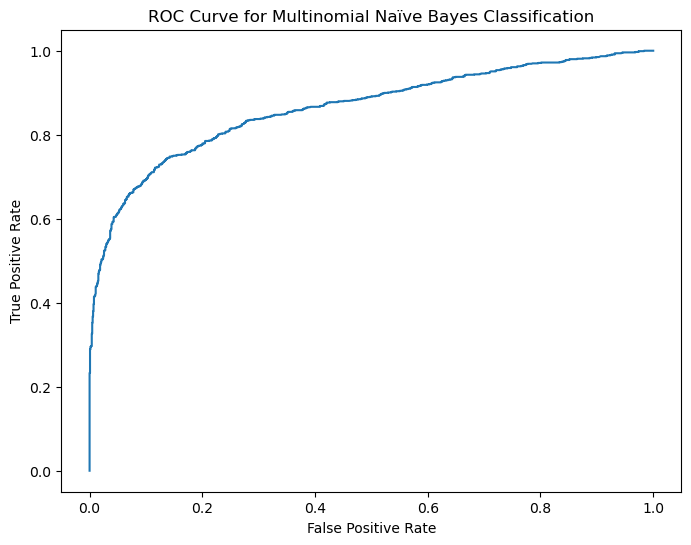

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_mnb = mnb.predict_proba(x_test_cv)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_mnb)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multinomial Naïve Bayes Classification')
plt.show()

### b) Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
m1 = LogisticRegression()
m1.fit(x_train_cv,y_train)

LogisticRegression()

In [33]:
print('Train Score',m1.score(x_train_cv,y_train)) # Train Accuracy
print('Test Score',m1.score(x_test_cv,y_test))

Train Score 0.9722274347907675
Test Score 0.8069176882661997


#### Predict the target for test data

In [34]:
ypred_m1 = m1.predict(x_test_cv)

print(len(ypred_m1))

2284


#### Computing Confusion matrix and classification report  

In [35]:
print(confusion_matrix(y_test,ypred_m1))
print(classification_report(y_test,ypred_m1))

[[1138  150]
 [ 291  705]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1288
           1       0.82      0.71      0.76       996

    accuracy                           0.81      2284
   macro avg       0.81      0.80      0.80      2284
weighted avg       0.81      0.81      0.80      2284



#### ROC Curve for Logistic Regression

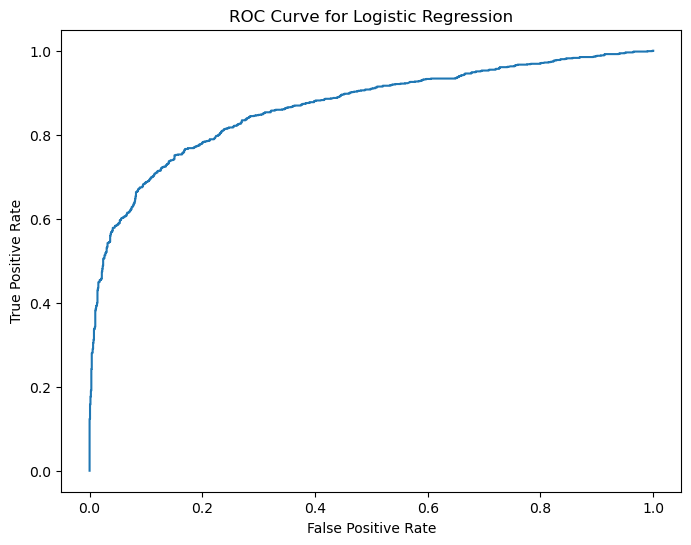

In [36]:
y_pred_m1 = m1.predict_proba(x_test_cv)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_m1)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.show()

### c) KNN Classification

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
m2 = KNeighborsClassifier(n_neighbors=30)
m2.fit(x_train_cv,y_train)

KNeighborsClassifier(n_neighbors=30)

In [39]:
print('Train score',m2.score(x_train_cv,y_train))
print('Test score',m2.score(x_test_cv,y_test))

Train score 0.6188778382435729
Test score 0.5963222416812609


#### Predict the target for test data

In [40]:
ypred_m2 = m2.predict(x_test_cv)

print(len(ypred_m2))

2284


#### Computing Confusion matrix and classification report 

In [41]:
print(confusion_matrix(y_test,ypred_m2))
print(classification_report(y_test,ypred_m2))

[[1287    1]
 [ 921   75]]
              precision    recall  f1-score   support

           0       0.58      1.00      0.74      1288
           1       0.99      0.08      0.14       996

    accuracy                           0.60      2284
   macro avg       0.78      0.54      0.44      2284
weighted avg       0.76      0.60      0.48      2284



#### ROC Curve For KNN Classification

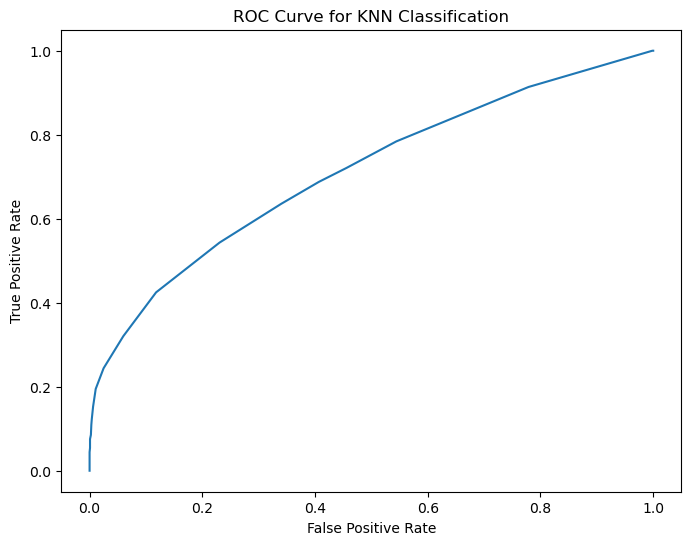

In [42]:
y_pred_m2 = m2.predict_proba(x_test_cv)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_m2)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Classification')
plt.show()

## 8. Report the model with the best accuracy.

"In conclusion, while evaluating the performance of our classification models, we observed that KNN Classification exhibited the lowest accuracy at 60%, prompting its exclusion from further consideration. Both Multinomial Naïve Bayes Classification and Logistic Regression demonstrated comparable accuracies of 81%. However, Logistic Regression displayed a notable disparity between its high train score of 97% and its slightly lower test score of 80%, indicating a potential risk of overfitting. Consequently, we opted to utilize Multinomial Naïve Bayes Classification due to its stable performance and absence of overfitting concerns."

# Model Performance Comparison

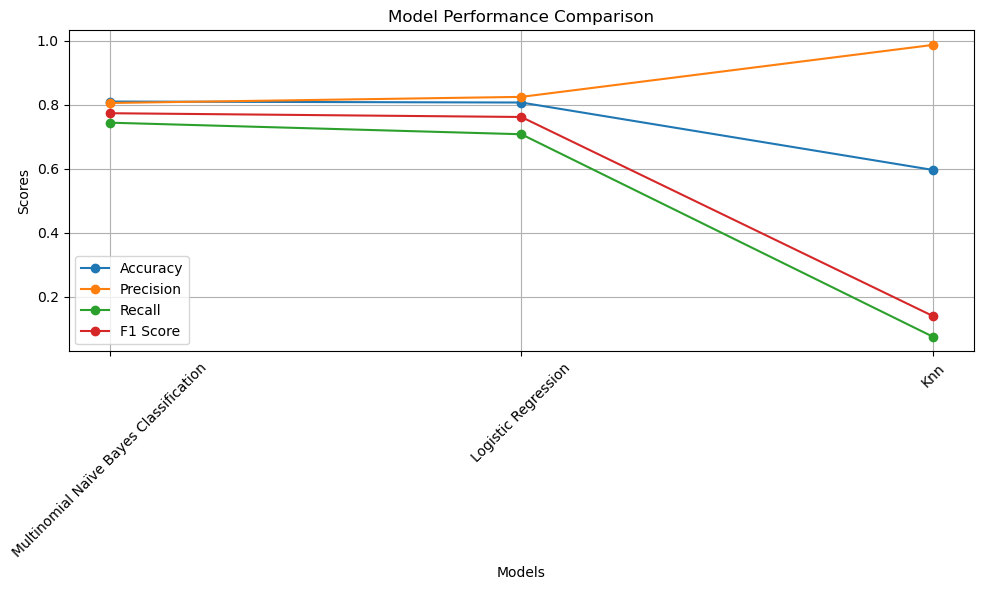

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define the models and their corresponding names
models = [mnb, m1, m2]
model_names = ["Multinomial Naïve Bayes Classification", "Logistic Regression", "Knn"]

# Create empty lists to store performance metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Calculate the performance metrics for each model
for model in models:
    y_pred = model.predict(x_test_cv)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * (precision * recall) / (precision + recall)
    
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Create line graphs for performance metrics
plt.figure(figsize=(10, 6))

plt.plot(model_names, accuracy_scores, label="Accuracy", marker='o')
plt.plot(model_names, precision_scores, label="Precision", marker='o')
plt.plot(model_names, recall_scores, label="Recall", marker='o')
plt.plot(model_names, f1_scores, label="F1 Score", marker='o')

plt.xlabel("Models")
plt.ylabel("Scores")
plt.title("Model Performance Comparison")
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

"In conclusion, while evaluating the performance of our classification models, we observed that KNN Classification exhibited the lowest accuracy at 60%, prompting its exclusion from further consideration. Both Multinomial Naïve Bayes Classification and Logistic Regression demonstrated comparable accuracies of 81%. However, Logistic Regression displayed a notable disparity between its high train score of 97% and its slightly lower test score of 80%, indicating a potential risk of overfitting. Consequently, we opted to utilize Multinomial Naïve Bayes Classification due to its stable performance and absence of overfitting concerns."

# Exporting Model 

In [44]:
import joblib

In [45]:
joblib.dump(mnb, 'alertsphere_model.pkl')

['alertsphere_model.pkl']

# Exporting Vectorizer 

In [46]:
joblib.dump(cv, 'count_vectorizer.pkl')

['count_vectorizer.pkl']

# End of Model Designing